In [1]:
#import df, full_df_onehot_ST
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
full_df_onehot_ST = pd.read_csv("https://raw.githubusercontent.com/rachelorey/Final-Project-Group9/master/full_df_onehot_ST.csv")
full_df_onehot_ST = full_df_onehot_ST.iloc[:,1:len(full_df_onehot_ST.columns)]
df = pd.read_table('https://raw.githubusercontent.com/rachelorey/Final-Project-Group9/master/MITU0022_OUTPUT.tab')
full_df_onehot = pd.read_csv("https://raw.githubusercontent.com/rachelorey/Final-Project-Group9/master/full_df_onehot.csv")

C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\rache\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


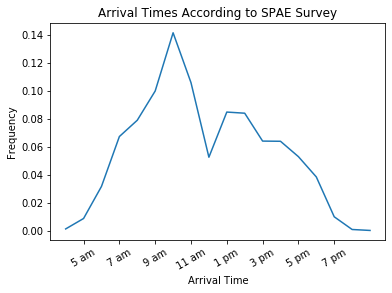

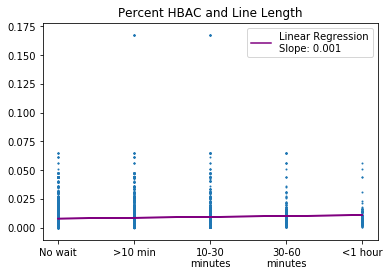

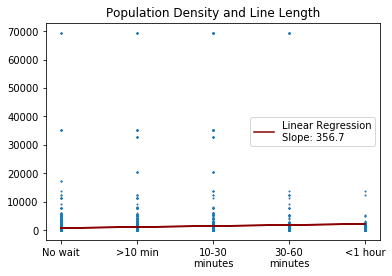

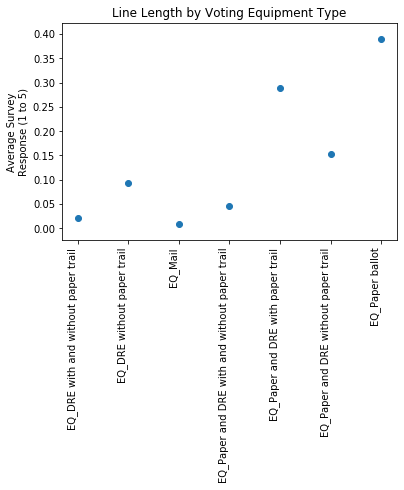

In [2]:
#arrival times graphic
arrivals = df[["Q10"]].dropna()
counts = pd.DataFrame(arrivals["Q10"].value_counts(normalize=True))
counts.reset_index(inplace=True)
counts = counts[counts["index"]<20]
counts = counts.sort_values(by=["index"])
fig,ax = plt.subplots()
ax.plot(counts["index"],counts["Q10"])
ax.set_title("Arrival Times According to SPAE Survey")
ax.set_ylabel("Frequency")
ax.set_xlabel("Arrival Time")
ax.set_xticks([2,4,6,8,10,12,14,16])
ax.set_xticklabels(["5 am","7 am","9 am","11 am","1 pm","3 pm","5 pm","7 pm"],rotation = 30,ha="center")
fig.savefig("arrivals.png",bbox_inches = "tight")

#black and hispanic pop graphic
fig,ax1 = plt.subplots()
ax1.scatter(full_df_onehot_ST["Q13"],full_df_onehot_ST["PercentHBAC"],s=1)
m, b = np.polyfit(full_df_onehot_ST["Q13"],full_df_onehot_ST["PercentHBAC"], 1)
ax1.plot(full_df_onehot_ST["Q13"], m*full_df_onehot_ST["Q13"] + b,label=("Linear Regression\nSlope: "+str(round(m,3))),c="purple")
ax1.set_title("Percent HBAC and Line Length")
ax1.legend(loc="best")
ax1.set_xticks([1,2,3,4,5])
ax1.set_xticklabels(["No wait",">10 min","10-30\nminutes","30-60\nminutes","<1 hour"])
fig.show()
fig.savefig("HBAC.png",bbox_inches = "tight")

#population density graphic
fig,ax2 = plt.subplots()
ax2.scatter(full_df_onehot_ST["Q13"],full_df_onehot_ST["dens2010"],s=1)
m, b = np.polyfit(full_df_onehot_ST["Q13"],full_df_onehot_ST["dens2010"], 1)
ax2.plot(full_df_onehot_ST["Q13"], m*full_df_onehot_ST["Q13"] + b,label=("Linear Regression\nSlope: "+str(round(m,1))),c="#8b0000")
ax2.set_title("Population Density and Line Length")
ax2.legend(loc="best")
ax2.set_xticks([1,2,3,4,5])
ax2.set_xticklabels(["No wait",">10 min","10-30\nminutes","30-60\nminutes","<1 hour"])
fig.show()
fig.savefig("dens2010.png",bbox_inches = "tight")

#equipment type graphic
EQs = full_df_onehot_ST.iloc[:,full_df_onehot_ST.columns.str.contains("EQ")]
Q13 = full_df_onehot_ST["Q13"]
cols = EQs.columns
l = list()
for i in range(len(EQs.columns)):
    l.append([cols[i],EQs.iloc[:,i].mean()])
y = np.empty(0)
x = np.empty(0)
z = 0
labs = list()
for i in l:
    y = np.append(y,i[1])
    x = np.append(x,z)
    labs.append(i[0])
    z+=1
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xticks(ticks=x)
ax.set_title("Line Length by Voting Equipment Type")
ax.set_xticklabels(labs,rotation=90,ha="right")
ax.set_ylabel("Average Survey\nResponse (1 to 5)")
fig.show()
fig.savefig("EQType.png",bbox_inches = "tight")